In [1]:
pip install control

In [2]:
import control
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Define transfer function of the system
s = control.tf('s')

<h1>Single Loop Level Control</h1>
<div>
<img src='https://drive.google.com/uc?export=view&id=1KnRCqpKn4ligNd9ZzWYzbRWGYL1JEjTs' width="500" align="left"/>
</div>   


<h1>Cascade Level Control</h1>
<div>
<img src='https://drive.google.com/uc?export=view&id=1f1cc2edIDHs-450Ed1wHQSkNWTEMFC5J' width="500" align="left"/>
</div>  

# Process

In [4]:
Kp_Process = 1.2
Tau_Process = 40.0
Delay_Process = 30.0

In [5]:
G_Process = Kp_Process/(Tau_Process*s+1)

In [6]:
num, den = control.pade(Delay_Process, n=2, numdeg=0)
Pade_Process = control.tf(num, den)

In [7]:
FOPDT_Process = control.series(G_Process, Pade_Process)

## Final Element

In [8]:
K_Final_Element = 5.0
Tau_Final_Element = 2.0
Delay_Final_Element = 1.0

In [9]:
G_Final_Element = K_Final_Element/(Tau_Final_Element*s+1)

In [10]:
num, den = control.pade(Delay_Final_Element, n=2, numdeg=0)
Pade_Final_Element = control.tf(num, den)

In [11]:
FOPDT_Final_Element = control.series(G_Final_Element, Pade_Final_Element)

<h1>Block Diagram</h1>
<div>
    <img src='https://drive.google.com/uc?export=view&id=1OC7AEIZSFVwUhZZbdNR0Ir8rC1kbujxz' width="500" align="left"/>
</div>  

In order to have an effective cascade control system, it is essential that the inner loop responds much faster than the outer loop.

## Master / Outer Controler -> Level

In [12]:
Kc_Master = 0.80
ti_Master = 50.0
td_Master = 10.0

In [13]:
# Define transfer function of the PID Controller
Master_Control = Kc_Master*(1 + (1/(ti_Master*s)) + (td_Master*s))

## Cascade / Inner Controler -> Flow

In [14]:
Kc_Cascade = 0.4
ti_Cascade = 3.0
td_Cascade = 0.3

In [15]:
# Define transfer function of the PID Controller
Cascade_Control = Kc_Cascade*(1 + (1/(ti_Cascade*s)) + (td_Cascade*s))

## Inner Loop

### Cascade Controler * Final Element

In [16]:
Series_Inner = control.series(Cascade_Control*FOPDT_Final_Element)

In [17]:
Inner_Loop = control.feedback(Series_Inner, 1, sign=-1)

### Inner Loop Step Response

In [18]:
t, y = control.step_response(Inner_Loop)

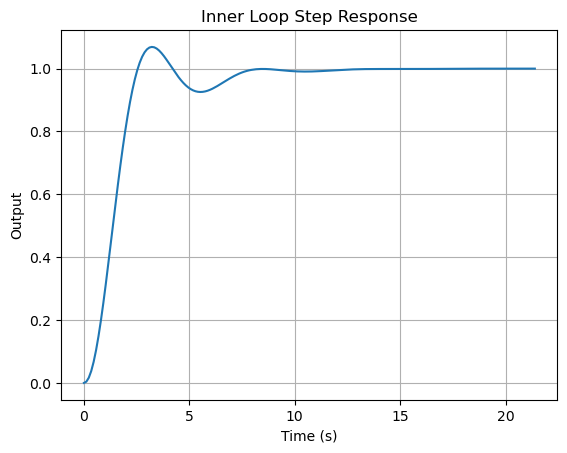

In [19]:
# Plot step response
plt.figure(1)
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Inner Loop Step Response')
plt.grid()
plt.show()

## Outer Loop

In [20]:
Series_Outer = control.series(Master_Control, Inner_Loop, FOPDT_Process)

In [21]:
Outer_Loop = control.feedback(Series_Outer, 1, sign=-1)

## System Step Response

In [22]:
t, y = control.step_response(Outer_Loop)

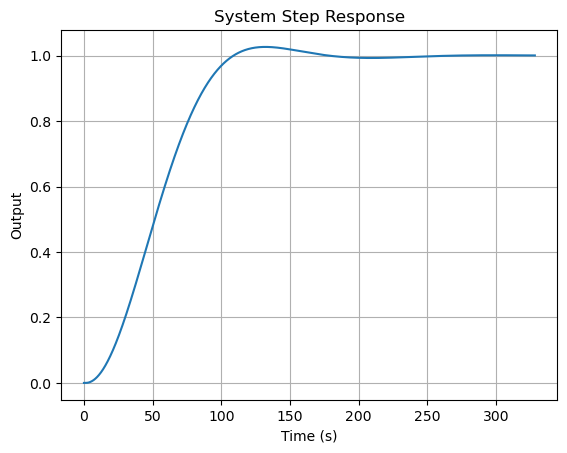

In [23]:
# Plot step response
plt.figure(1)
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('System Step Response')
plt.grid()
plt.show()